<a href="https://colab.research.google.com/github/shaunakp21/MIS515-Spring-2024/blob/main/Classification_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split,cross_val_score # GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Read the csv file into Pandas dataframe

df1 = pd.read_csv('/content/drive/MyDrive/train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/test.csv')

df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()
df.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Arrival Delay in Minutes,satisfaction,Inflight wifi service_0,Inflight wifi service_1,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
129875,1,1,34,0,0,526,0.0,neutral or dissatisfied,False,False,...,False,False,False,True,False,False,False,False,True,False
129876,1,0,23,0,0,646,0.0,satisfied,False,False,...,False,False,False,True,False,False,False,False,True,False
129877,0,0,17,1,1,828,0.0,neutral or dissatisfied,False,False,...,False,False,True,False,False,False,True,False,False,False
129878,1,0,14,0,0,1127,0.0,satisfied,False,False,...,False,False,False,True,False,False,False,False,True,False
129879,0,0,42,1,1,264,0.0,neutral or dissatisfied,False,False,...,False,False,False,False,False,True,False,False,False,False


<ipython-input-6-732e7aeaa12a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='satisfaction', palette=["#FF5733", "#33FF57"], ax=axis[1])  # Custom color palette


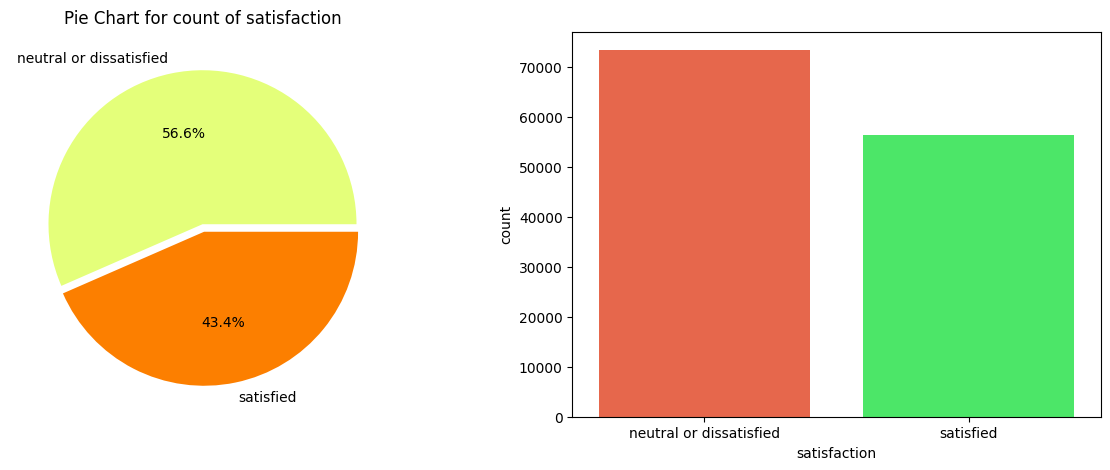

In [ ]:
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Pie chart for count of satisfaction
df['satisfaction'].value_counts().plot.pie(ax=axis[0], autopct='%1.1f%%', title="Pie Chart for count of satisfaction",
                                  legend=False, startangle=0, explode=(0, 0.05), ylabel='', colormap='Wistia')

# Count plot
sns.countplot(data=df, x='satisfaction', palette=["#FF5733", "#33FF57"], ax=axis[1])  # Custom color palette

plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0
On-board service,129880.0,3.383023,1.287099,0.0,2.0,4.0,4.0,5.0


In [ ]:
df = df.dropna()

In [ ]:
# splits the data into training and test sets
train, test = train_test_split(df,test_size=0.30, random_state=0)


In [ ]:
numerical_variables = ["Age", "Flight Distance",  "Departure Delay in Minutes", "Arrival Delay in Minutes"]
categorical_variables = list(set(df.columns) - set(numerical_variables))


<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


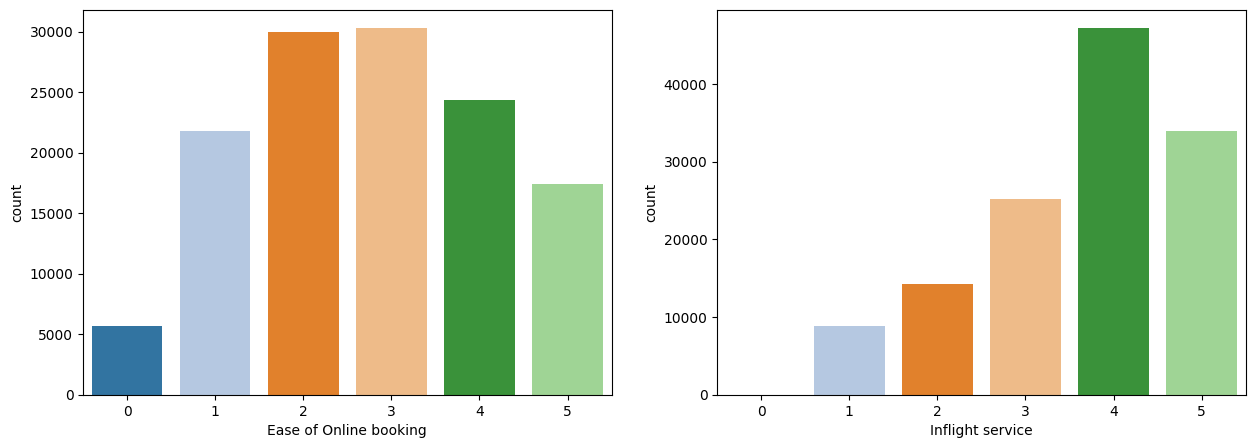

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


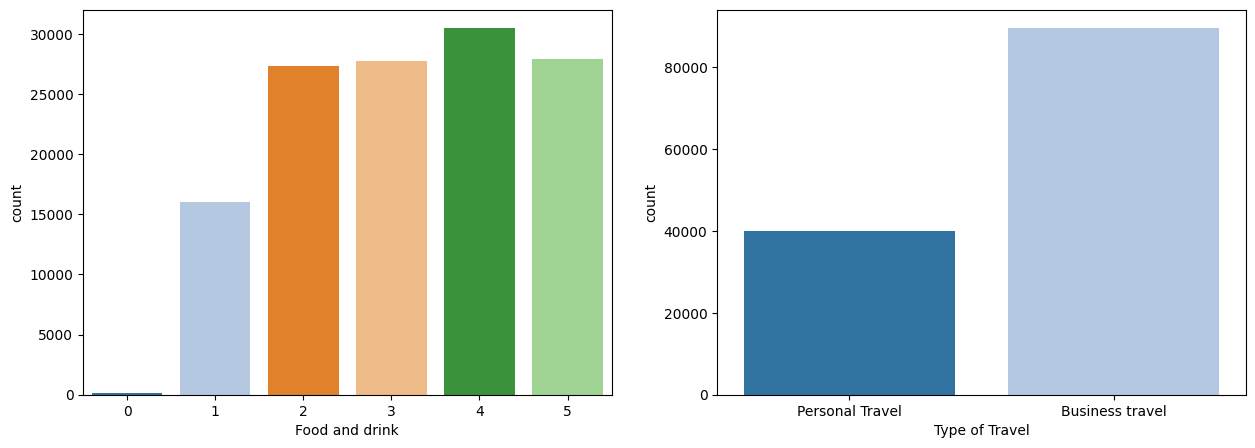

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


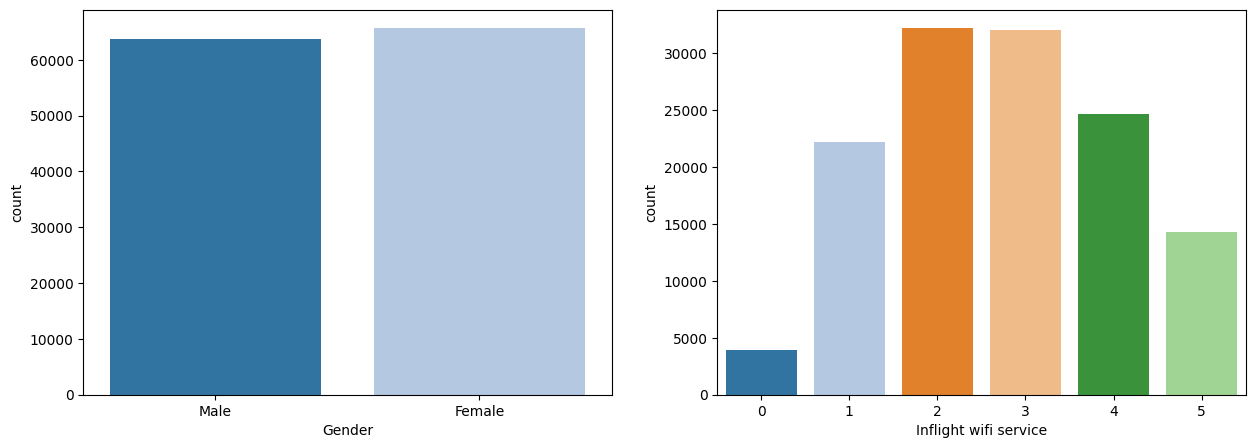

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


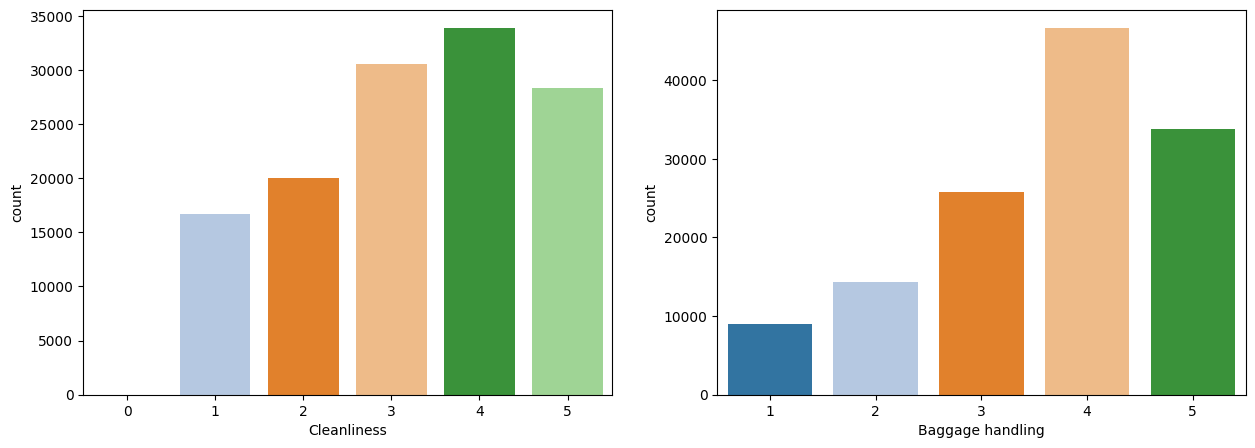

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


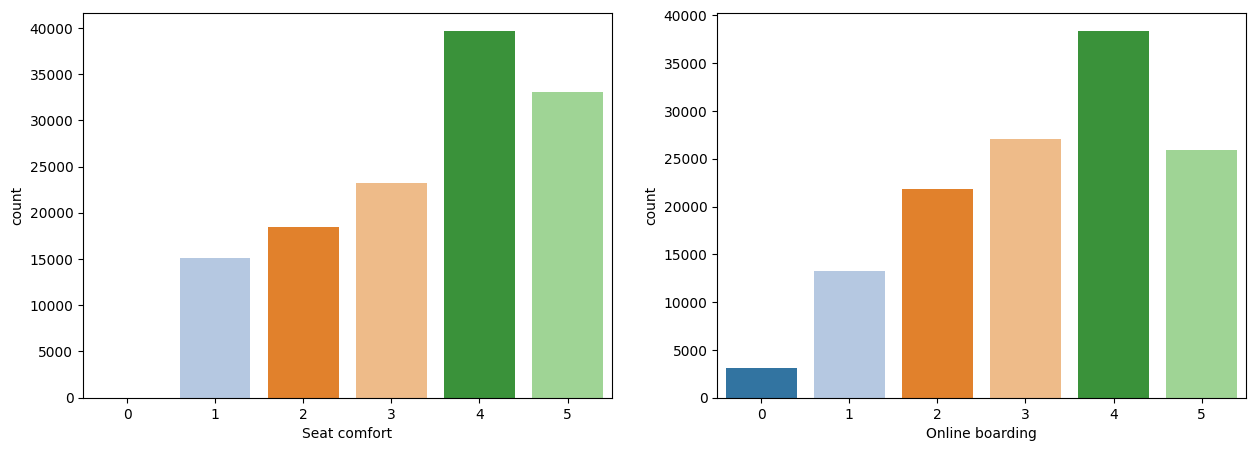

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


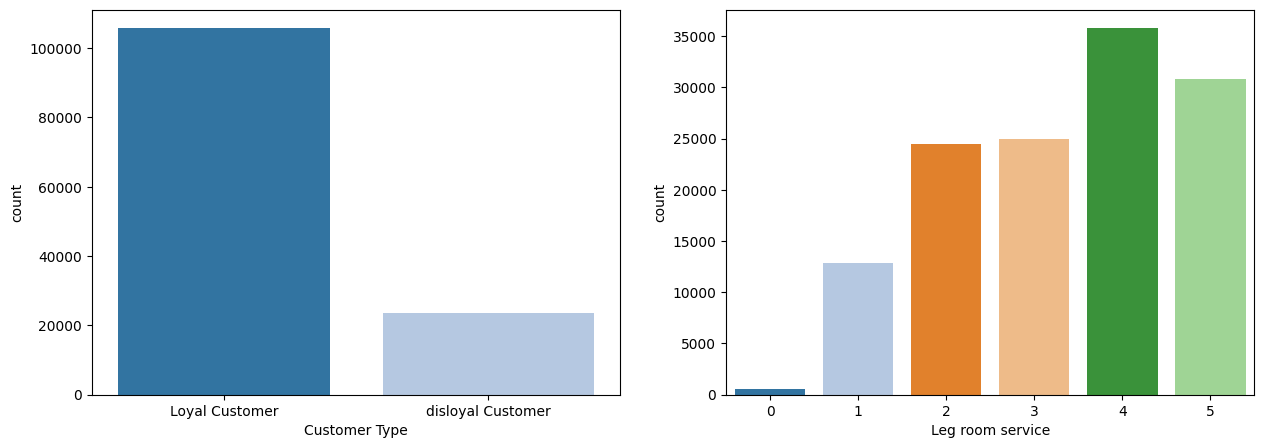

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


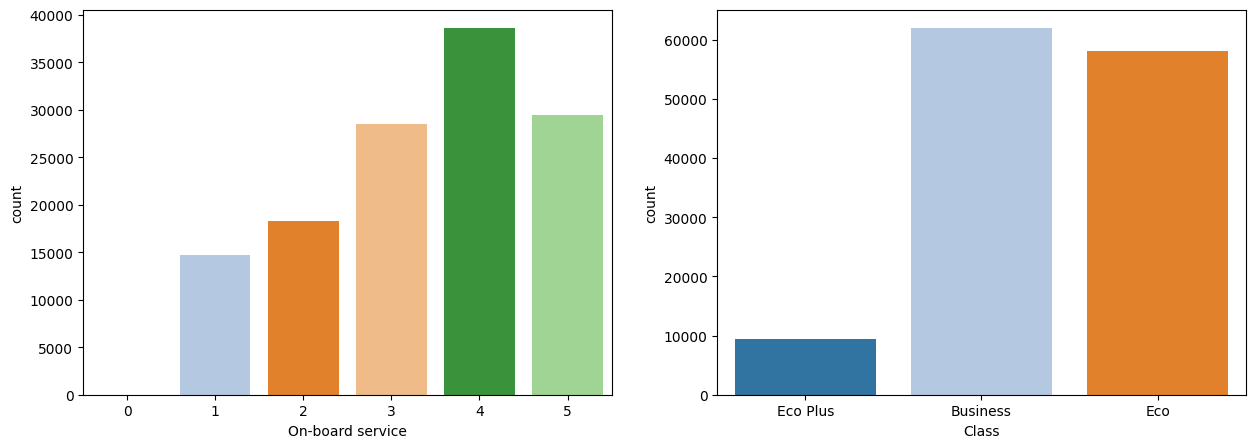

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


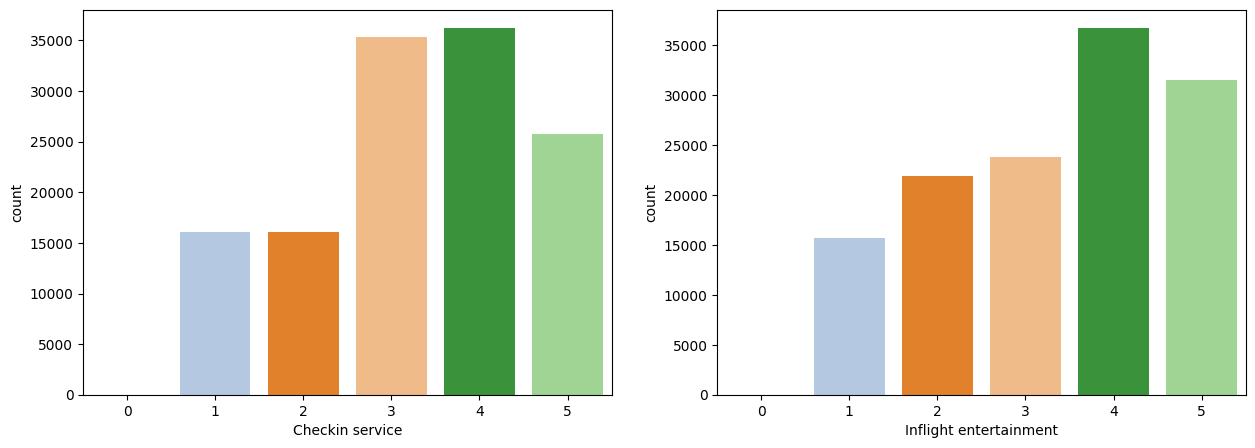

<ipython-input-11-3ed8f9ec764a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
<ipython-input-11-3ed8f9ec764a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')


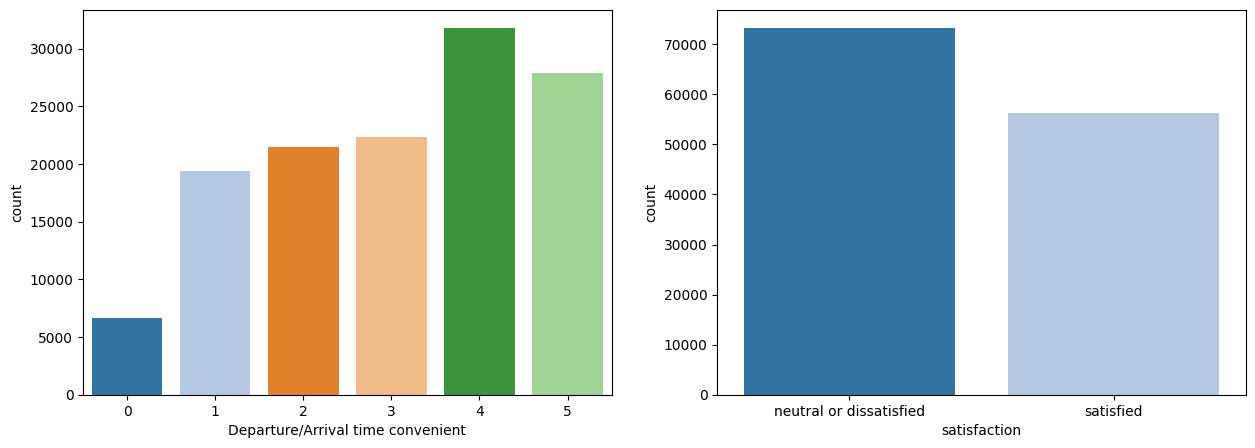

In [ ]:
for i in range(0, len(categorical_variables),2):
    df[categorical_variables[i]] = df[categorical_variables[i]].astype('object')
    if i+1==len(categorical_variables):
        sns.countplot(x=df[categorical_variables[i]], palette='tab20')
        plt.show();
    else:
        df[categorical_variables[i+1]] = df[categorical_variables[i+1]].astype('object')
        figure, axis = plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
        sns.countplot(ax=axis[0], x=df[categorical_variables[i]], palette='tab20')
        sns.countplot(ax=axis[1], x=df[categorical_variables[i+1]], palette='tab20')
        plt.show();

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,5,...,5,5,4,3,4,4,5,5,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,1,...,1,1,1,5,3,1,4,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,5,...,5,5,4,3,4,4,4,5,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,2,...,2,2,2,5,3,1,4,2,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,4,...,5,3,3,4,4,3,3,3,0.0,satisfied


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])
df['Class'] = label_encoder.fit_transform(df['Class'])

df = pd.get_dummies(df, columns=['Inflight wifi service', 'Departure/Arrival time convenient',
                                             'Ease of Online booking', 'Food and drink', 'Online boarding',
                                             'Seat comfort', 'Inflight entertainment', 'On-board service',
                                             'Leg room service', 'Baggage handling', 'Checkin service',
                                             'Inflight service', 'Cleanliness'])

# Split the data into predictors (X) and target variable (y)
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence not reached
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9296470769943626


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**************** LOGISTIC REGRESSION MODEL RESULTS *********************
Accuracy score of testing set 0.93 



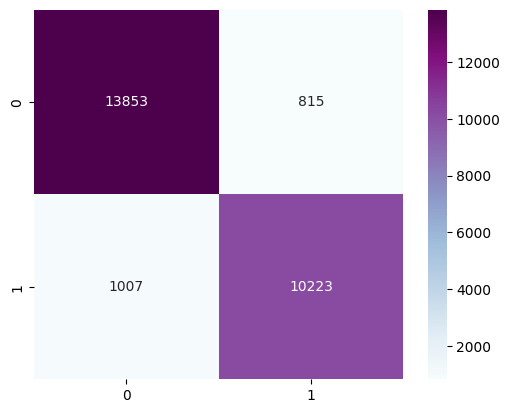

In [ ]:
print("**************** LOGISTIC REGRESSION MODEL RESULTS *********************")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred),2), '\n')

cm_log_reg = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_log_reg, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

************* Random Forest Classifier MODEL RESULTS ************
Accuracy score of testing set 0.96 



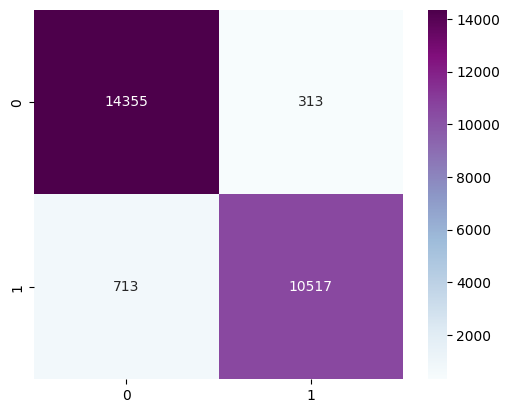

In [ ]:
print("************* Random Forest Classifier MODEL RESULTS ************")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_rfc),2), '\n')
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dt = dtc.predict(X_test)


**************** Decision Tree Classifier MODEL RESULTS ***********************
Accuracy score of testing set 0.95 



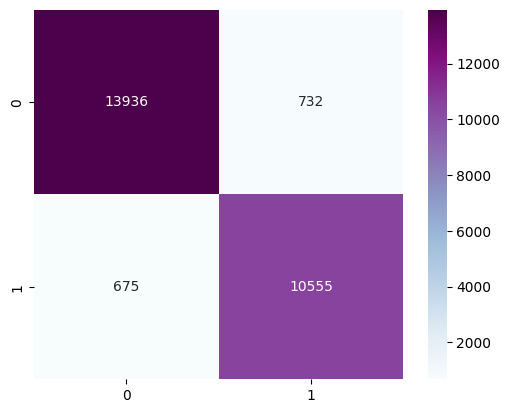

In [ ]:
print("**************** Decision Tree Classifier MODEL RESULTS ***********************")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_dt),2), '\n')
cm_dtc = confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dtc, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

********* K Neighbors Classifier MODEL RESULTS *********
Accuracy score of testing set 0.72 



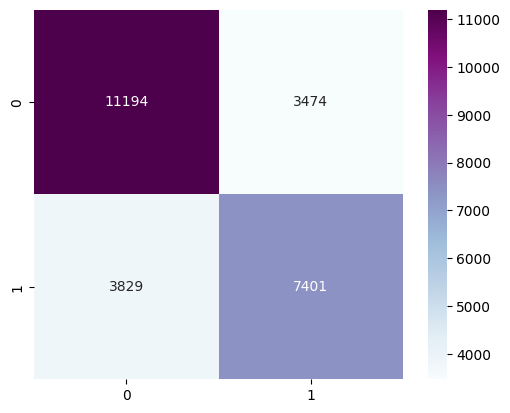

In [ ]:
print("********* K Neighbors Classifier MODEL RESULTS *********")
print('Accuracy score of testing set', round(accuracy_score(y_test, y_pred_knn),2), '\n')
cm_knn = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True, square=True, fmt='1', cmap = 'BuPu')
plt.show()

In [ ]:
models = [model, rfc, dtc, knn]

result_accuracy = []
results_accuracy = pd.DataFrame(columns=["Models", "Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model, X_test, y_test, cv=3, scoring="accuracy", n_jobs=-1).mean()
    result_accuracy = pd.DataFrame([[names, accuracy*100]], columns=["Models", "Accuracy"])
    results_accuracy = results_accuracy._append(result_accuracy)

<ipython-input-22-ea70dd9a9c33>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Models', data=results_accuracy.sort_values(by='Accuracy',ascending=False), palette="coolwarm")


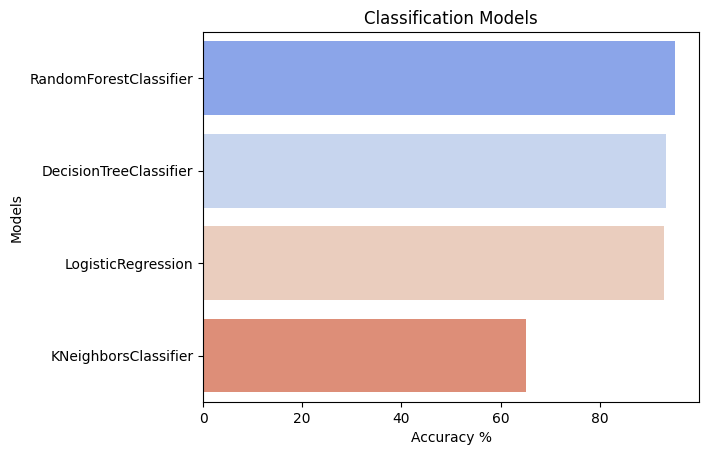

In [ ]:
sns.barplot(x='Accuracy', y='Models', data=results_accuracy.sort_values(by='Accuracy',ascending=False), palette="coolwarm")
plt.xlabel('Accuracy %')
plt.ylabel("Models")
plt.title("Classification Models", loc="center")
plt.show();